# Linear Regression

$$
\hat{y}_{i} = \beta_{0} + \beta_{1}X_{i,1} + \beta_{2}X_{i,2} \dots \beta_{p-1}X_{i,p-1} \quad i = 1, 2, \dots n
$$

where $n$ is the sample size (rows) and $p-1$ is the number of features (columns). In matrix form
$$
\begin{bmatrix}
    y_{1}\\
    y_{2}\\
    \vdots\\
    y_{n}
   \end{bmatrix}_{n \times 1} = \begin{bmatrix}
                                    1 & X_{1, 1} & X_{1, 2} & \dots & X_{1, p-1}\\
                                    1 & X_{2, 1} & X_{2, 2} & \dots & X_{2, p-1}\\
                                    \vdots & \vdots & \vdots & \vdots & \vdots\\
                                    1 & X_{n, 1} & X_{n, 2} & \dots & X_{n, p-1} 
                                \end{bmatrix}_{n \times p} \begin{bmatrix}
                                                            \beta_{0}\\
                                                            \beta_{1}\\
                                                            \vdots\\
                                                            \beta_{p-1}
                                                            \end{bmatrix}_{p \times 1}
$$
i.e., 
$$
\mathbf{y} = \mathbf{X\beta}
$$
By choosing Mean Squared Error as cost function,
$$
\begin{align*} J(\beta_{0}, \beta_{1} \dots \beta_{p-1}) &= \dfrac{1}{N}\sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}\\
&= \dfrac{1}{N}\sum_{i=1}^{n} (y_{i} - (\beta_{0} + \beta_{1}X_{i,1} + \beta_{2}X_{i,2} \dots \beta_{p-1}X_{i,p-1}))^{2} \end{align*}
$$
To minimise $J(\beta_{0}, \beta_{1} \dots \beta_{p-1})$ we use gradient descent method. Generally if we want to minimise vector valued function $f(\mathbf{x})$ we calculate iteratively the value of $\mathbf{x}$ by
$$
\mathbf{x}_{k+1} = \mathbf{x}_{k} - \mathbf{\nabla}f(\mathbf{x})
$$
Similary, to minimise $J(\beta_{0}, \beta_{1} \dots \beta_{p-1})$ we have to calculate
$$
\mathbf{\beta}_{k+1} = \mathbf{\beta}_{k} - \alpha\mathbf{\nabla}J(\mathbf{\mathbf{\beta}})
$$
where $\alpha$ is the learning rate or step size and
$$
\beta = \begin{bmatrix}
            \beta_{0}\\
            \beta_{1}\\
            \vdots\\
            \beta_{p-1}
            \end{bmatrix}_{p \times 1} \quad\quad\quad
            \mathbf{\nabla}J(\mathbf{\mathbf{\beta}}) = \displaystyle\begin{bmatrix}
            \dfrac{\partial J}{\partial \beta_{0}}\\
            \dfrac{\partial J}{\partial \beta_{1}}\\
            \vdots \\
            \dfrac{\partial J}{\partial \beta_{p-1}} 
            \end{bmatrix}_{p \times 1}
$$
From
$$
J(\beta_{0}, \beta_{1} \dots \beta_{p-1}) = \dfrac{1}{N}\sum_{i=1}^{n} (y_{i} - (\beta_{0} + \beta_{1}X_{i,1} + \beta_{2}X_{i,2} \dots \beta_{p-1}X_{i,p-1}))^{2}
$$
for $\mathbf{\nabla}J(\mathbf{\mathbf{\beta}})$ we have
$$
\begin{align*}
\dfrac{\partial J}{\partial \beta_{0}} &= \dfrac{1}{N}\sum_{i=1}^{n} (y_{i} - (\beta_{0} + \beta_{1}X_{i,1} + \beta_{2}X_{i,2} \dots \beta_{p-1}X_{i,p-1}))(-1)\\
&= \dfrac{-1}{N}\sum_{i=1}^{n} 2(y_{i} - \hat{y}_{i})\\
\dfrac{\partial J}{\partial \beta_{1}} &= \dfrac{1}{N}\sum_{i=1}^{n} (y_{i} - (\beta_{0} + \beta_{1}X_{i,1} + \beta_{2}X_{i,2} \dots \beta_{p-1}X_{i,p-1}))(-1)\\
&= \dfrac{-1}{N}\sum_{i=1}^{n} 2(y_{i} - \hat{y}_{i})(X_{i,1})\\
&\vdots\\
\dfrac{\partial J}{\partial \beta_{p-1}} &= \dfrac{1}{N}\sum_{i=1}^{n} (y_{i} - (\beta_{0} + \beta_{1}X_{i,1} + \beta_{2}X_{i,2} \dots \beta_{p-1}X_{i,p-1}))(-1)\\
&= \dfrac{-1}{N}\sum_{i=1}^{n} 2(y_{i} - \hat{y}_{i})(X_{i,p-1})
\end{align*}
$$
From matrix form of
$$
\begin{align*}
\mathbf{J}_{n \times 1} &= (\mathbf{y}_{n \times 1} - \hat{\mathbf{y}}_{n \times 1})^{2}\\
&= (\mathbf{y} - (\mathbf{X \beta }))_{n \times 1}^{2}
\end{align*}
$$ 
and for $\mathbf{\nabla}J(\mathbf{\mathbf{\beta}})$
$$
\begin{align*}
\mathbf{\nabla}J(\mathbf{\mathbf{\beta}}) &= \left[\dfrac{\partial J}{\partial \beta}\right]_{p \times 1}\\
&= (\mathbf{y}_{n \times 1} - (\mathbf{X \beta })_{n \times 1})(-\mathbf{X}_{n \times p})\\
&=  -\mathbf{X}^{T}_{p \times n}(\mathbf{y} - (\mathbf{X \beta }))_{n \times 1}
\end{align*}
$$
and finally solve for $\beta$'s
$$
(\mathbf{\beta}_{k+1})_{p \times 1} = (\mathbf{\beta}_{k})_{p \times 1} + \alpha \mathbf{X}^{T}_{p \times n}(\mathbf{y} - (\mathbf{X \beta }))_{n \times 1}
$$


In [64]:
import numpy as np

In [192]:
class LinReg:
    def __init__(self, learning_rate = 0.001, max_iter = 10000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.betas = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        X = np.append(np.ones((X.shape[0],1)), X, axis=1)
        y = y.reshape(n_samples,1)
        self.betas = np.zeros((n_features + 1, 1))

        for i in range(self.max_iter):
            y_pred = np.dot(X, self.betas)
            error = y - y_pred
            d_betas = (-2/n_samples)*np.dot(X.T, error)
            self.betas = self.betas - self.learning_rate*d_betas

    def predict(self, X):
        n_samples = X.shape[0]
        X = np.append(np.ones((X.shape[0],1)), X, axis=1)
        y_pred = np.dot(X, self.betas).reshape(n_samples,)
        return y_pred

In [183]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [206]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [207]:
sk_reg = LinearRegression()
sk_reg.fit(X_train, y_train)
sk_y_pred= sk_reg.predict(X_test)
print("R2 for sklearn linear regression", r2_score(y_test, sk_y_pred))

reg = LinReg()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("R2 for custom linear regression", r2_score(y_test, y_pred))
#x = np.linspace(-2,2.5,100)
#y = x*reg.betas[1] + reg.betas[0]
#plt.scatter(X_test,y_test)
#plt.plot(x, y, c='r')


R2 for sklearn linear regression 0.9298359010944421
R2 for custom linear regression 0.9298359005333331


In [233]:
X, y = datasets.make_regression(n_samples=1000, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

R2 for sklearn linear regression 0.713095604334703
R2 for custom linear regression 0.7130956027858553


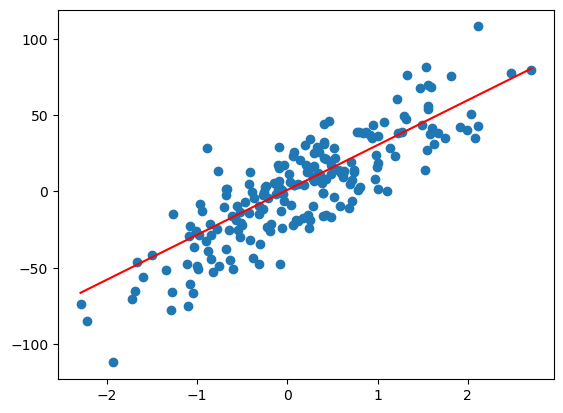

In [235]:
sk_reg = LinearRegression()
sk_reg.fit(X_train, y_train)
sk_y_pred= sk_reg.predict(X_test)
print("R2 for sklearn linear regression", r2_score(y_test, sk_y_pred))

reg = LinReg()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("R2 for custom linear regression", r2_score(y_test, y_pred))
x = np.linspace(X_test.min(),X_test.max(),100)
y = x*reg.betas[1] + reg.betas[0]
plt.scatter(X_test,y_test)
plt.plot(x, y, c='r')